In [17]:
import os
import numpy as np
from PIL import Image
import umap
import matplotlib.pyplot as plt
import json

# Set the path to your image directory
image_dir = '.'

# Set the image dimensions
img_height, img_width, img_channels = 32, 32, 3

# Load the images into a numpy array
images = []
labels = []
filenames = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png') and len(filename.split('_'))==3:
        try:
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).resize((img_width, img_height))
            img_array = np.array(img)
            if img_array.shape == (img_height, img_width, img_channels):
                images.append(img_array)
                label = filename.split('_')[-1].split('.')[0]
                labels.append(label)
                filenames.append(filename)
            else:
                print(f"Skipping {filename} due to incorrect shape: {img_array.shape}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

images = np.array(images)
name_labels = np.array(labels)
print(np.unique(name_labels))
# make the labels integers
label_dict = {label: i for i, label in enumerate(np.unique(name_labels))}
labels = np.array([label_dict[label] for label in name_labels])
print(labels)
# print bins of labels
print(np.bincount(labels))

['airplane' 'automobile' 'bird' 'cat' 'deer' 'dog' 'frog' 'horse' 'ship'
 'truck']
[2 5 0 0 9 9 6 1 5 6 9 4 3 3 9 9 8 5 8 9 8 2 0 6 7 0 5 3 0 7 2 4 8 7 0 5 8
 1 9 9 8 6 6 6 0 6 2 4 9 4 9 7 2 9 6 4 4 5 3 2 0 7 7 0 9 0 8 9 7 3 3 6 6 0
 2 9 8 2 6 4 8 7 6 8 2 3 5 5 7 9 3 3 8 3 6 1 7 1 2 2 5 1 1 7 4 2 3 5 3 5 5
 6 5 6 4 4 0 5 3 7 0 8 1 5 4 0 7 7 9 2 5 2 2 8 7 8 9 0 1 3 6 0 6 0 7 1 2 9
 7 8 4 0 8 6 7 6 8 3 6 1 9 6 0 0 9 6 0 2 8 1 5 4 5 7 3 8 5 4 0 1 4 6 1 4 1
 0 9 2 2 8 4 0 7 5 4 2 0 8 3 5 7 9 1 6 1 8 8 8 7 6 3 8 0 0 7 6 0 7 3 4 5 6
 2 8 1 2 9 5 8 3 9 3 1 5 5 1 4 0 1 0 7 2 2 9 9 9 1 5 1 1 9 2 8 8 7 6 0 0 3
 6 3 5 5 0 4 3 7 2 6 5 1 9 5 2 1 2 7 4 5 8 9 8 8 2 9 9 2 3 6 6 4 3 2 8 4 3
 4 3 9 5 7 2 0 8 6 5 2 4 3 3 0 2 3 5 9 9 9 4 6 0 2 2 0 1 2 7 1 7 8 7 2 0 1
 6 3 0 0 8 2 5 0 6 7 8 5 4 3 3 8 5 4 0 7 9 2 9 2 9 6 7 0 5 3 4 6 1 3 0 6 4
 1 9 7 6 5 3 3 9 1 2 2 8 8 3 6 4 8 7 9 9 5 4 4 4 0 6 3 4 6 6 9 8 9 3 8 8 3
 5 7 2 8 6 7 0 4 9 5 6 9 7 0 0 1 2 9 5 4 9 4 1 9 7 9 3 6 6 8 8 5 5 8 0 4 1
 7 8 2 7 4 0 9 1 

/opt/homebrew/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


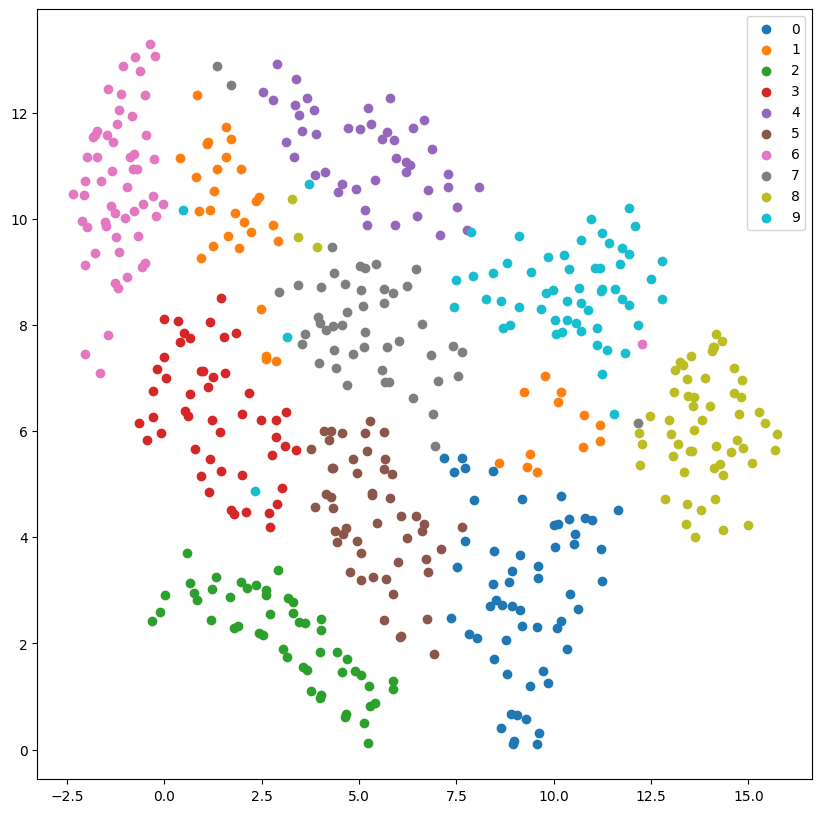

In [14]:
# Standardize the data
images = images.reshape(images.shape[0], -1)
images = (images - images.mean(axis=0)) / images.std(axis=0)

# Use supervised UMAP
reducer = umap.UMAP(n_neighbors=51,          # Adjust the size of the local neighborhood
    min_dist=1,            # Control the tightness of packing
    metric='euclidean',      # Distance metric for the data
    n_components=2,          # Number of dimensions in the output space
    random_state=42,         # Random seed for reproducibility
    target_metric='categorical',  # Distance metric for the labels
    target_weight=0.5        # Balance between data and label topology)
)
images_2d = reducer.fit_transform(images, y=labels)

# Plot the images in the 2D space
plt.figure(figsize=(10, 10))
for i, label in enumerate(np.unique(labels)):
    label_mask = labels == label
    plt.scatter(images_2d[label_mask, 0], images_2d[label_mask, 1], label=label)
plt.legend()
plt.show()

In [15]:
# Function to save 2D projections to a JSON file
def save_projections_to_json(filenames, projections, output_file):
    projections_dict = {filename: projection.tolist() for filename, projection in zip(filenames, projections)}
    with open(output_file, 'w') as f:
        json.dump(projections_dict, f)

# Save the 2D projections to a JSON file
output_file = 'projections.json'
save_projections_to_json(filenames, images_2d, output_file)